** Cosine Similarity **

If two apps are of similar category most likely they have similar set of words. Like any app which belong to the category of games will have words game in it.

We can use cosine similarity to closely match the test set with the highly similar app in the training set. 

In [1]:
%run 'LoadData.ipynb'

Populating the interactive namespace from numpy and matplotlib


In [5]:
(app_data, app_names_with_labels) = get_training_data('training/data_with_comma.csv')

csr_app_data = app_data.tocsr()
app_labels = np.array([ val[1] for val in app_names_with_labels ])
app_names = np.array([val[0] for val in app_names_with_labels])

total_sorted_app_labels = sorted(set(app_labels))

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(total_sorted_app_labels))
    plt.xticks(tick_marks, total_sorted_app_labels, rotation=90)
    plt.yticks(tick_marks, total_sorted_app_labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Overall Precision = 0.547080129026 Recall 0.539810685965
Overall Precision = 0.522065276247 Recall 0.52112201216
Overall Precision = 0.556398032519 Recall 0.552126370994
Overall Precision = 0.535557038314 Recall 0.536068591557
Overall Precision = 0.528987153983 Recall 0.520720674724
Overall Precision = 0.541531890467 Recall 0.540921180314
Overall Precision = 0.541837802659 Recall 0.537664577136
Overall Precision = 0.541692573604 Recall 0.532820614929
Overall Precision = 0.536379481561 Recall 0.529833819689
Overall Precision = 0.555440131103 Recall 0.553121555571


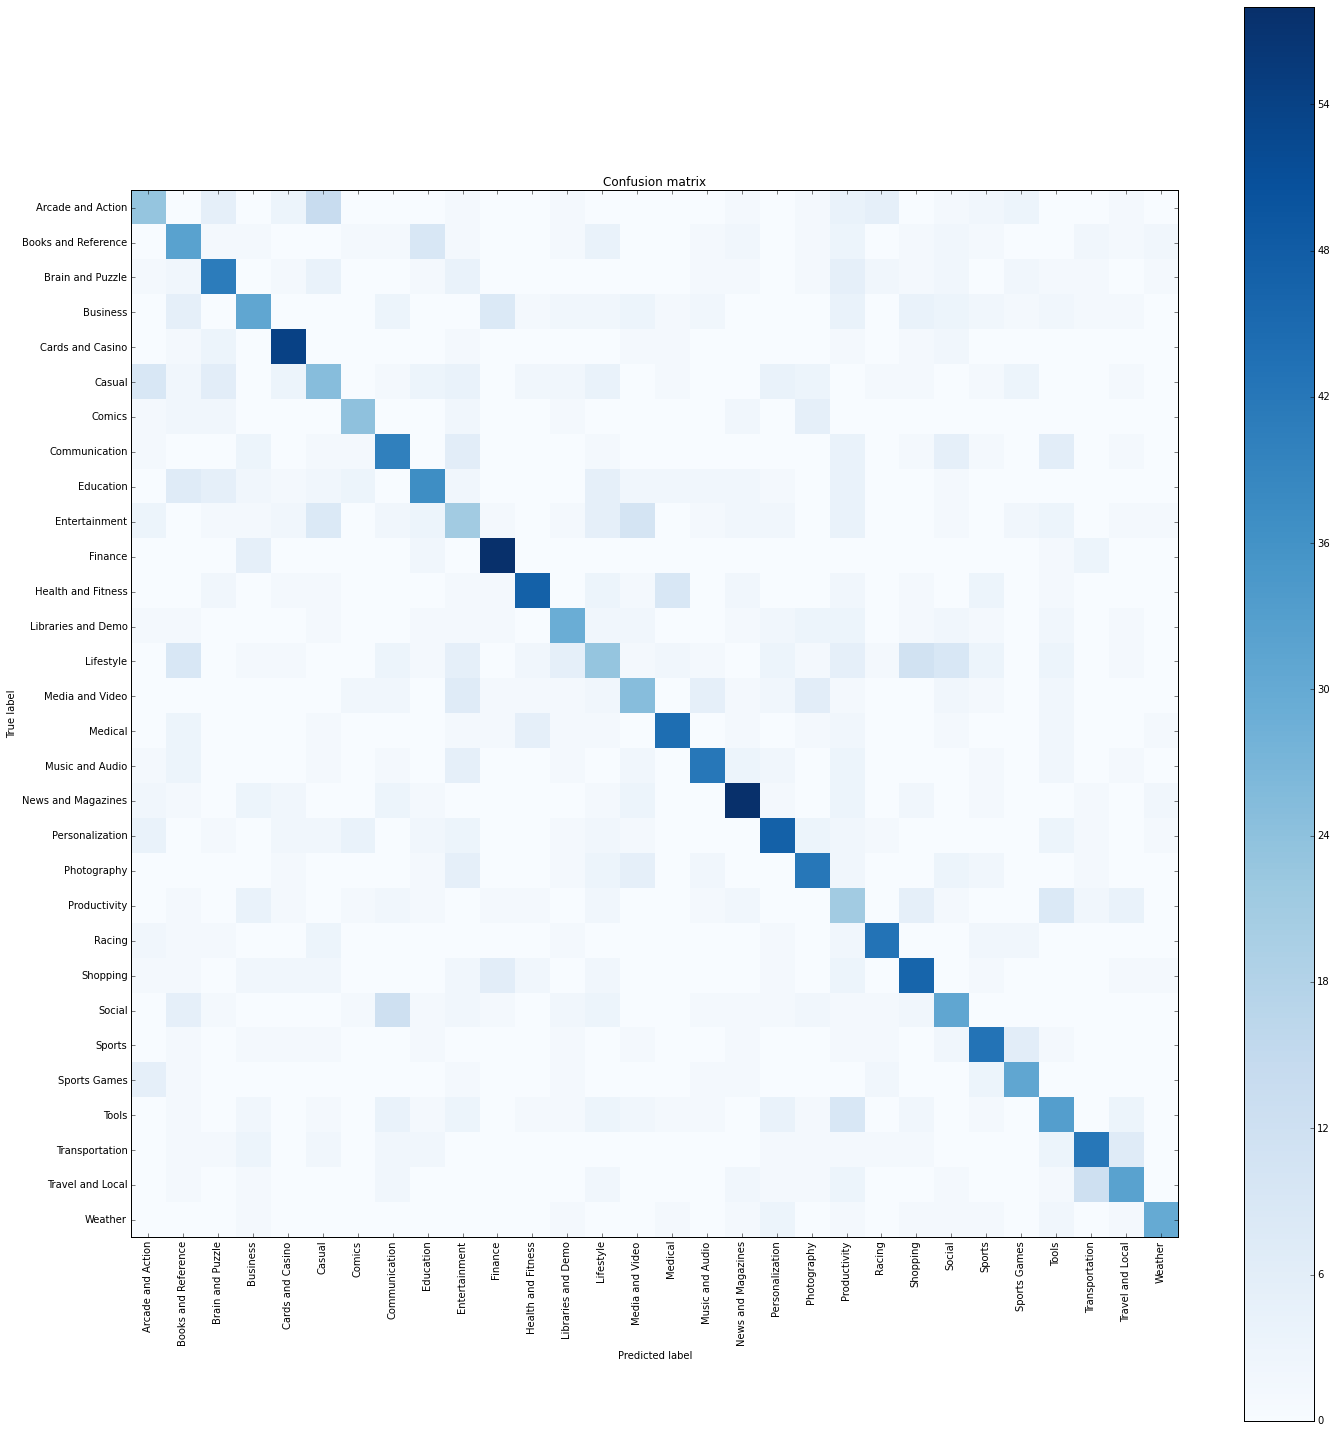

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics.pairwise as smp
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.cross_validation import KFold

kf = KFold(n=20104, n_folds=10)
for train_idx, test_idx in kf:
    train_data = csr_app_data[train_idx]
    train_labels = app_labels[train_idx]
    test_data = csr_app_data[test_idx] 
    test_labels = app_labels[test_idx]
    test_app_names = app_names[test_idx]
    predict_labels = []
    for idx, test_vector in enumerate(test_data):
            clf = smp.cosine_similarity(train_data, test_vector)
            max_idx = clf.argmax()
            predict_labels.append(train_labels[max_idx])
            
    predict_labels_arr = np.array(predict_labels)

    (precision, recall, fscore, support) = precision_recall_fscore_support(test_labels, predict_labels_arr)
    
    cm = confusion_matrix(test_labels, predict_labels_arr, total_sorted_app_labels)
    
    print("Overall Precision = {0} Recall {1}".format(sum(precision)/precision.size, sum(recall)/recall.size))

plot_confusion_matrix(cm)

    

With the confusion matrix it is clear that if the two classes are related like "Transportation" and "Travel and Local" we see there is a lot of errors. Similar case can be made for "Productivity" and "Tools", "Social" and "communication", "Music and Audio" and "Entertainment". For eliminating these we need more data. With less data it is impossible to eliminate such cases. 

But there are as some errors like "Arcade and Action" been predicted as "Finance". The question would how in the world Arcade and Action been seen as Finance.  Example is 

org.lukeallen.bomberfull,Fly a NATO ground-attack fighter to repel a Soviet invasion. The full version gives you: -A flyable A-10 Warthog  armed with a 30mm cannon and rockets  able to shoot down the MiG! (See screenshots.) -Ability to keep upgrades when your plane is shot down -An extra starting life -Optional onscreen joystick -No ads If you enjoyed the free version  you'll love the full version! Support free-market capitalism  independent games development  and apple pie by getting it today! Game summary: It's 1970  and the communists are invading Europe. It's your job to bomb them back to 1916. Tactical nuclear weapons are authorized-- it's gonna be fun on the bun! Here are answers to frequent questions about the ordering process: -The purchase is a one-time charge  not a subscription. And  you'll be able to install the game on all your future devices at no additional charge. (Your Google account remembers all app purchases.) -All credit card processing is handled by Google  so individual developers cannot see your credit card number. -The app will begin downloading as soon as Google charges your card. Usually it's within a few minutes of paying  but in some cases it can take up to a few hours. If an app still hasn't downloaded after a few hours  it may mean the credit card failed to authorize: check your Gmail account to see if Google sent you an email about it. If they didn't  email me at the link below  tell me the name on the credit card  and I'll check on your order's progress with Google.


This is mostly due to the words like "creditcard", "communists", "capitalism", "purchases" matching finance more. Also there is no use of the word games in the description. This makes the cosine similarity low for "Arcade and Action" and high for Finance. 

** Reducing the Dimensions ** 

Reducing the dimensions and see if we get better precision and recall. With the number of dimensions to 200 we are getting a 3% improvement. With 2000 dimensions we dont see any improvement.

Overall Precision = 0.53910386165 Recall 0.537363545672
Overall Precision = 0.537122700885 Recall 0.541555162951
Overall Precision = 0.554972598033 Recall 0.551336226337
Overall Precision = 0.536776624118 Recall 0.539729582711
Overall Precision = 0.534530773659 Recall 0.530641811196
Overall Precision = 0.543142000774 Recall 0.54321069306
Overall Precision = 0.562618172057 Recall 0.564561368856
Overall Precision = 0.547089383093 Recall 0.54741891688
Overall Precision = 0.54861556967 Recall 0.547592409754
Overall Precision = 0.558724814218 Recall 0.564231010397


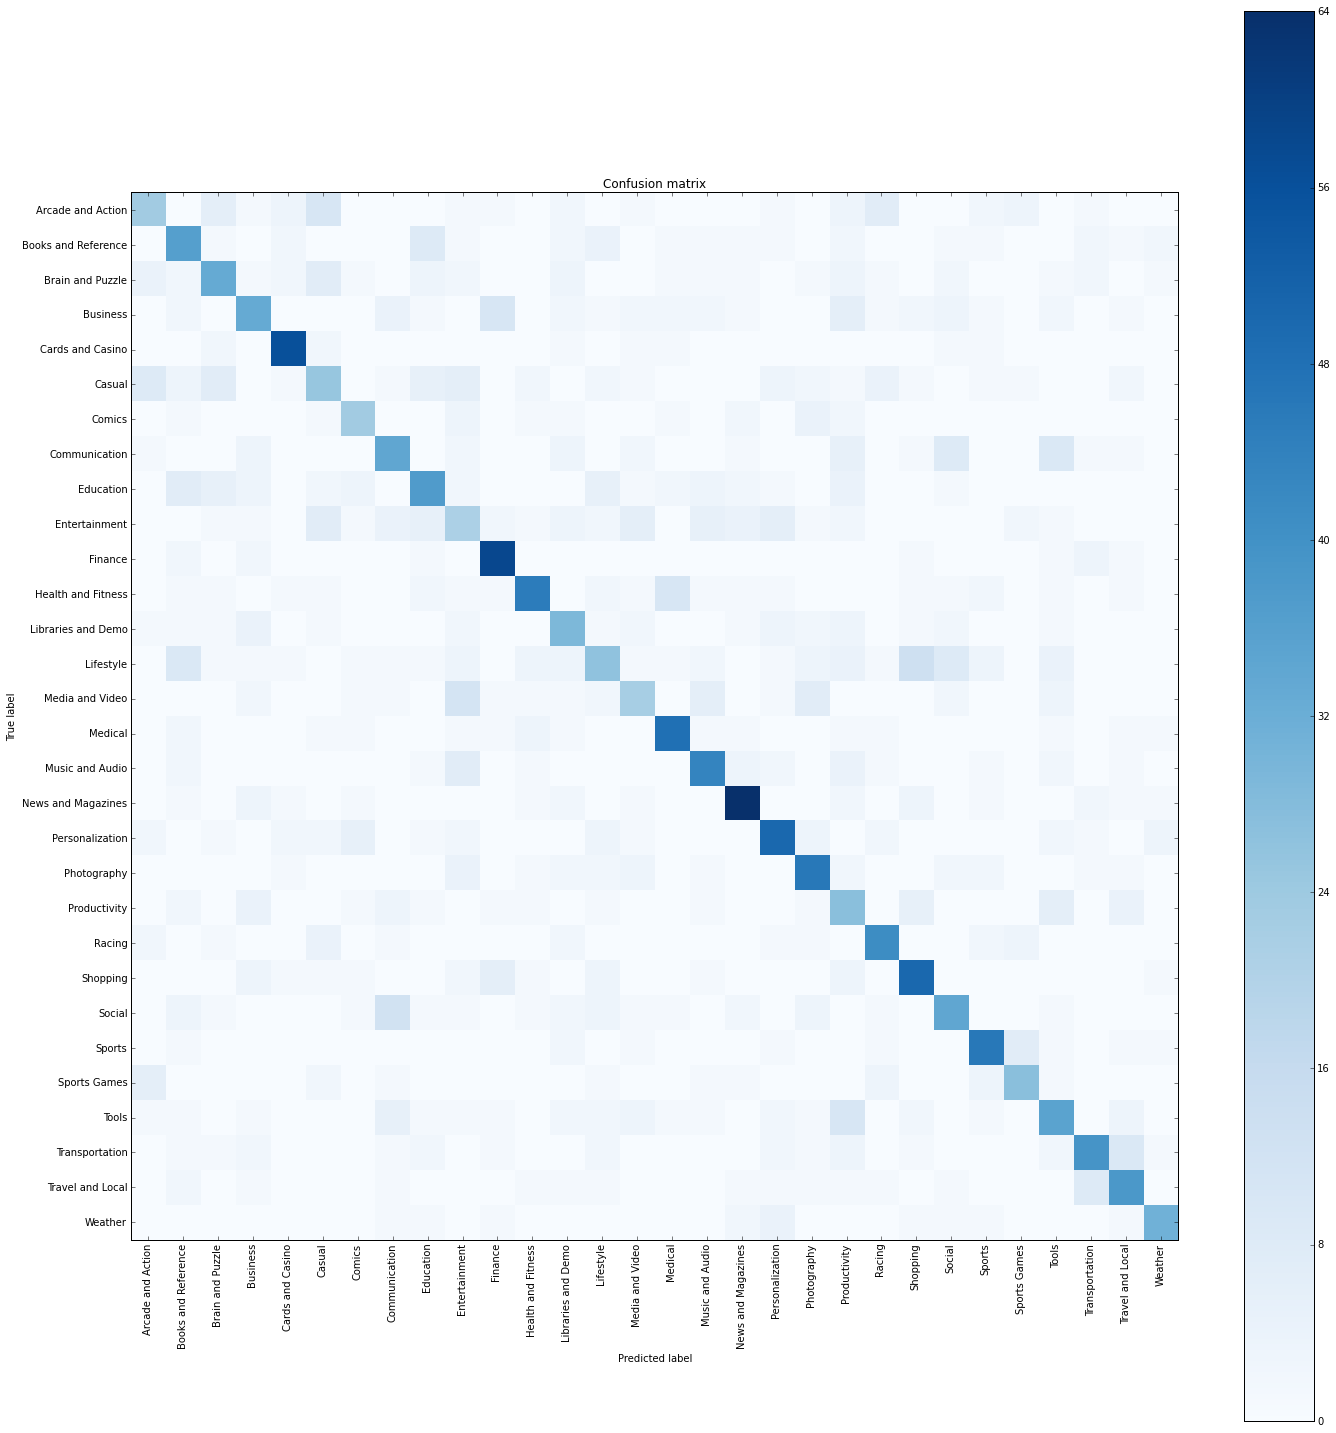

In [23]:
from sklearn.decomposition import TruncatedSVD
import numpy as np
import sklearn.metrics.pairwise as smp
from sklearn.metrics import precision_recall_fscore_support
from sklearn.cross_validation import KFold

kf = KFold(n=20104, n_folds=10)
for train_idx, test_idx in kf:
    train_data = csr_app_data[train_idx]
    train_labels = app_labels[train_idx]
    test_data = csr_app_data[test_idx] 
    test_labels = app_labels[test_idx]
    svd = TruncatedSVD(n_components=2000, random_state=42)
    reduced_train_data = svd.fit_transform(train_data)
    predict_labels = []
    for idx, test_vector in enumerate(test_data):
        reduced_test_vector = svd.transform(test_vector)
        clf = smp.cosine_similarity(reduced_train_data, reduced_test_vector)
        max_idx = clf.argmax()
        predict_labels.append(train_labels[max_idx])
            
    predict_labels_arr = np.array(predict_labels)

    (precision, recall, fscore, support) = precision_recall_fscore_support(test_labels, predict_labels_arr)
    
    cm = confusion_matrix(test_labels, predict_labels_arr, total_sorted_app_labels)

    print("Overall Precision = {0} Recall {1}".format(sum(precision)/precision.size, sum(recall)/recall.size))

plot_confusion_matrix(cm)